# IPL Dataset Analysis

## Problem Statement
We want to know as to what happens during an IPL match which raises several questions in our mind with our limited knowledge about the game called cricket on which it is based. This analysis is done to know as which factors led one of the team to win and how does it matter.

## About the Dataset :
The Indian Premier League (IPL) is a professional T20 cricket league in India contested during April-May of every year by teams representing Indian cities. It is the most-attended cricket league in the world and ranks sixth among all the sports leagues. It has teams with players from around the world and is very competitive and entertaining with a lot of close matches between teams.

The IPL and other cricket related datasets are available at [cricsheet.org](https://cricsheet.org/%c2%a0(data). Feel free to visit the website and explore the data by yourself as exploring new sources of data is one of the interesting activities a data scientist gets to do.

## About the dataset:
Snapshot of the data you will be working on:<br>
<br>
The dataset 136522 data points and 23 features<br>

|Features|Description|
|-----|-----|
|match_code|Code pertaining to individual match|
|date|Date of the match played|
|city|City where the match was played|
|venue|Stadium in that city where the match was played|
|team1|team1|
|team2|team2|
|toss_winner|Who won the toss out of two teams|
|toss_decision|toss decision taken by toss winner|
|winner|Winner of that match between two teams|
|win_type|How did the team won(by wickets or runs etc.)|
|win_margin|difference with which the team won| 
|inning|inning type(1st or 2nd)|
|delivery|ball delivery|
|batting_team|current team on batting|
|batsman|current batsman on strike|
|non_striker|batsman on non-strike|
|bowler|Current bowler|
|runs|runs scored|
|extras|extra run scored|
|total|total run scored on that delivery including runs and extras|
|extras_type|extra run scored by wides or no ball or legby|
|player_out|player that got out|
|wicket_kind|How did the player got out|
|wicket_fielders|Fielder who caught out the player by catch|


### Analyzing data using matplotlib module

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action = "ignore", category = FutureWarning)

data_ipl = pd.read_csv('./data/ipl_dataset.csv')
data_ipl.head()

,match_code,date,city,venue,team1,team2,toss_winner,toss_decision,winner,win_type,...,batsman,non_striker,bowler,runs,extras,total,extras_type,player_out,wicket_kind,wicket_fielders
0,392203,2009-05-01,East London,Buffalo Park,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,bat,Mumbai Indians,runs,...,ST Jayasuriya,SR Tendulkar,I Sharma,0,1,1,wides,NaN,NaN,NaN
1,392203,2009-05-01,East London,Buffalo Park,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,bat,Mumbai Indians,runs,...,ST Jayasuriya,SR Tendulkar,I Sharma,1,0,1,NaN,NaN,NaN,NaN
2,392203,2009-05-01,East London,Buffalo Park,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,bat,Mumbai Indians,runs,...,SR Tendulkar,ST Jayasuriya,I Sharma,0,1,1,wides,NaN,NaN,NaN
3,392203,2009-05-01,East London,Buffalo Park,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,bat,Mumbai Indians,runs,...,SR Tendulkar,ST Jayasuriya,I Sharma,0,0,0,NaN,NaN,NaN,NaN
4,392203,2009-05-01,East London,Buffalo Park,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,bat,Mumbai Indians,runs,...,SR Tendulkar,ST Jayasuriya,I Sharma,2,0,2,NaN,NaN,NaN,NaN


### Plot the number of matches played each season

In [3]:
data_ipl['year'] = data_ipl['date'].apply(lambda x : x[:4])
no_season=data_ipl['year'].nunique()
print('The number of season : ',no_season)
no_matches=data_ipl.groupby('year')['match_code'].nunique()
type(no_matches)
print('Number of matches:')
print(no_matches)

The number of season :  9
Number of matches:
year
2008    58
2009    57
2010    60
2011    73
2012    74
2013    76
2014    60
2015    59
2016    60
Name: match_code, dtype: int64


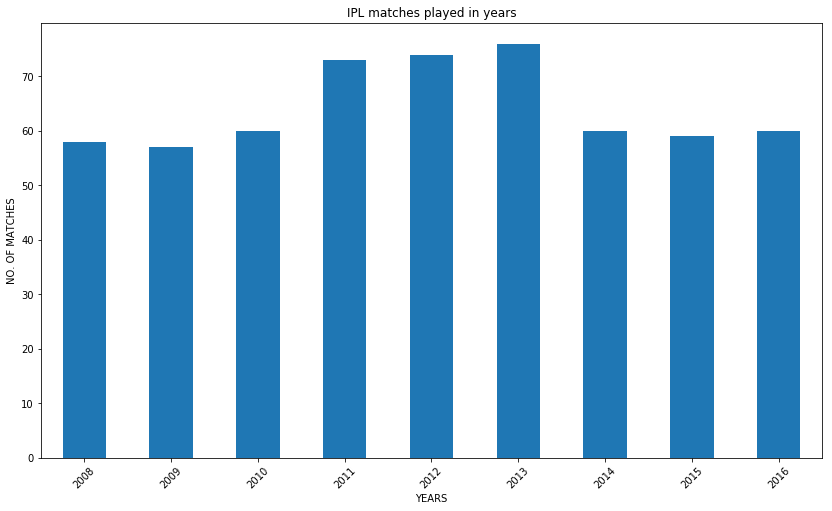

In [4]:

plt.figure(figsize = (14,8))
no_matches.plot.bar()
plt.title('IPL matches played in years')
plt.xlabel(str('Years').upper())
plt.ylabel(str('No. of matches').upper())
plt.xticks(rotation=45)
plt.show()

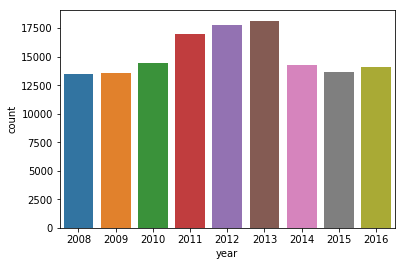

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
match_wise_data = data_ipl.drop_duplicates(subset='match_code',keep='first').reset_index(drop=True)
#print(match_wise_data)
sns.countplot(x='year',data=data_ipl)
plt.show()

### Plot the number of matches in each venue

In [10]:
venues = data_ipl.groupby('venue')['match_code'].nunique().sort_values(ascending = False)
type(venues)

pandas.core.series.Series

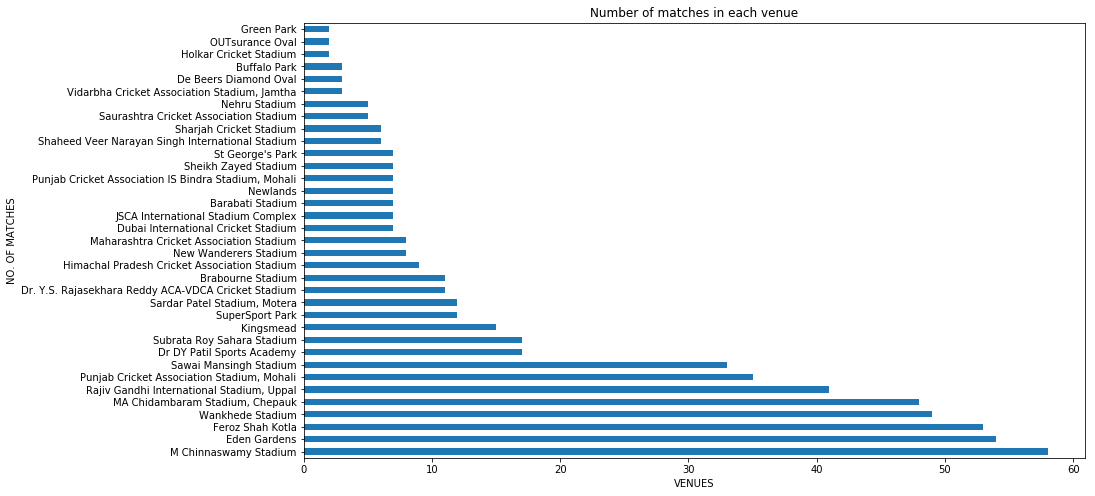

In [12]:
plt.figure(figsize = (14,8))
venues.plot.barh() #Horizontal bar plot by  barh()
plt.title('Number of matches in each venue')
plt.xlabel(str('venues').upper())
plt.ylabel(str('No. of matches').upper())
#plt.xticks(rotation=90)
plt.show()

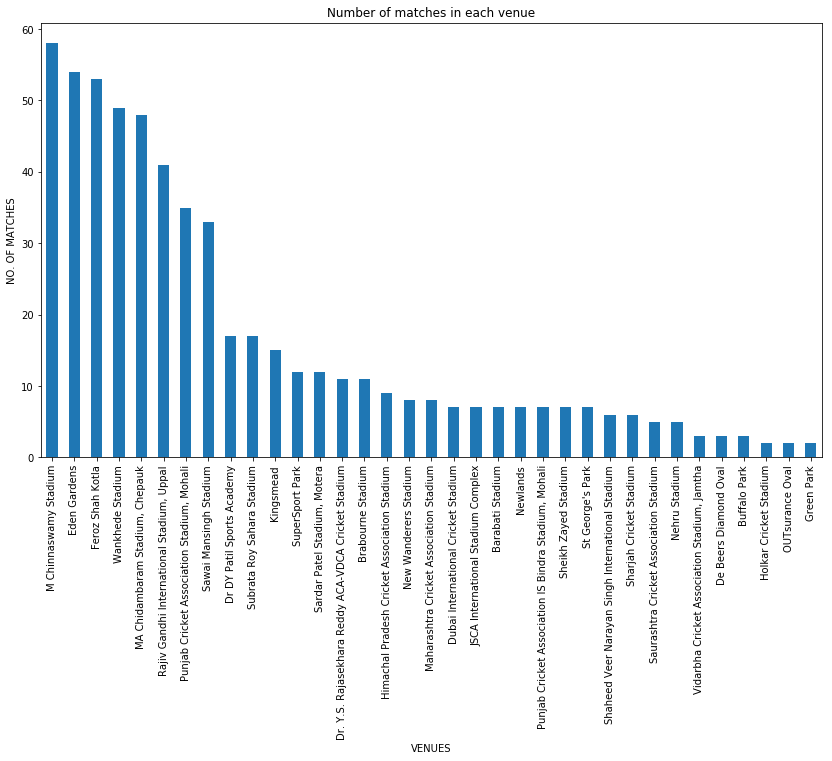

In [13]:
plt.figure(figsize = (14,8))
venues.plot.bar()
plt.title('Number of matches in each venue')
plt.xlabel(str('venues').upper())
plt.ylabel(str('No. of matches').upper())
plt.xticks(rotation=90)
plt.show()

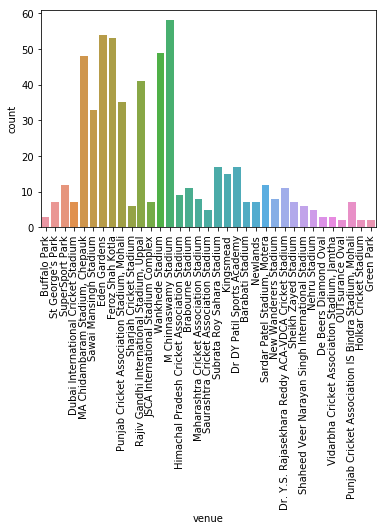

In [24]:
sns.countplot(x='venue',data=match_wise_data)
plt.xticks(rotation='vertical')
plt.show()

### Plot the total no. of wins gained by teams across all seasons 

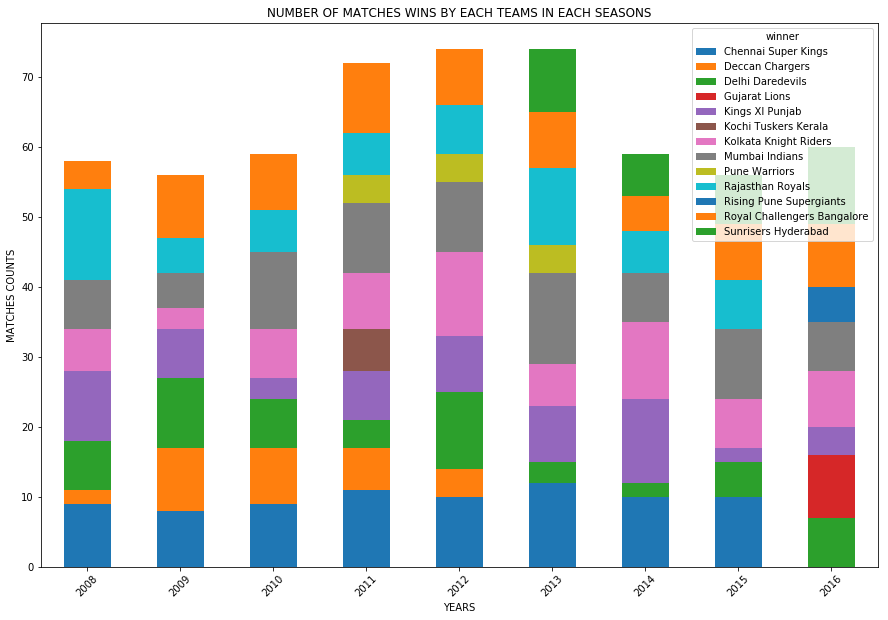

In [7]:
wins_teams=data_ipl.groupby(['year','winner'])['match_code'].nunique()

wins_teams.unstack().plot(kind='bar', stacked=True, figsize=(15,10)) #for unstacked bar chart
plt.title(str('Number of matches wins by each teams in each seasons').upper())
plt.xlabel(str('Years').upper())
plt.ylabel(str('matches counts').upper())
plt.xticks(rotation=45)
plt.show()

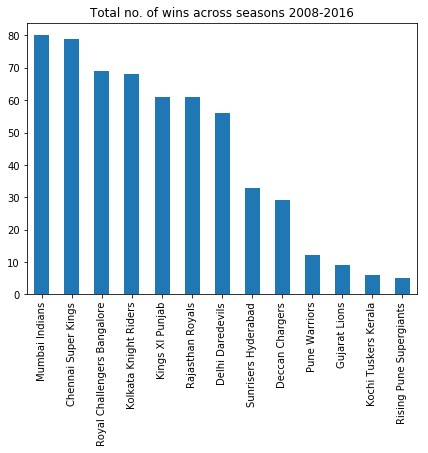

In [114]:
match_wise_data = data_ipl.drop_duplicates(subset='match_code', keep='first').reset_index(drop=True)
total_wins = match_wise_data['winner'].value_counts() 
plot = total_wins.plot(kind='bar', title = "Total no. of wins across seasons 2008-2016", figsize=(7,5))
plt.xticks(fontsize =10 , rotation=90);

### What are the total number of matches played by each team across all seasons ?

In [26]:
temp_data = pd.melt(match_wise_data, id_vars=['match_code', 'year'], value_vars= ['team1', 'team2'])
matches_played = temp_data.value.value_counts()
print(matches_played)

Mumbai Indians                 140
Royal Challengers Bangalore    139
Kings XI Punjab                134
Delhi Daredevils               133
Kolkata Knight Riders          132
Chennai Super Kings            131
Rajasthan Royals               118
Deccan Chargers                 75
Sunrisers Hyderabad             62
Pune Warriors                   46
Gujarat Lions                   16
Kochi Tuskers Kerala            14
Rising Pune Supergiants         14
Name: value, dtype: int64


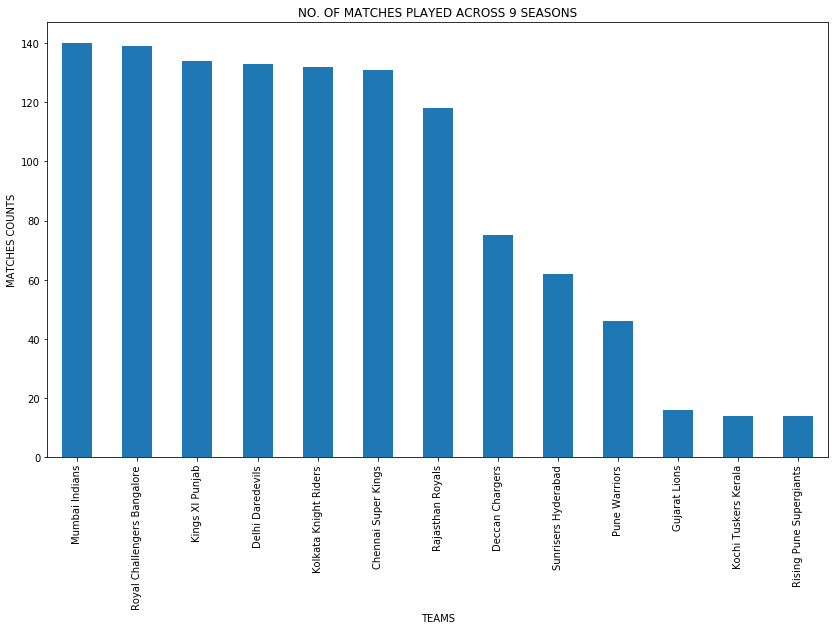

In [33]:
team1 = match_wise_data["team1"]
team2 = match_wise_data["team2"]
matches= pd.concat([team1,team2]).value_counts()
plt.figure(figsize = (14,8))
matches.plot(x= matches.index, y = matches, kind = 'bar')
plt.title(str('No. of matches played across 9 seasons').upper())
plt.xlabel(str('Teams').upper())
plt.ylabel(str('matches counts').upper())
plt.xticks(fontsize = 10, rotation=90)
plt.show()

### Bowlers with high ratings usually have a record of higher no. of wickets to their name. Implementing the same within our data we might get who qualifies to being an outstanding bowler across seasons.

In [13]:
# Bowlers performance can be judged by categories such 'bowled' and 'caught and bowled'
# subset the dataframe according to above categories
bowled = data_ipl[(data_ipl['wicket_kind']=='bowled')]


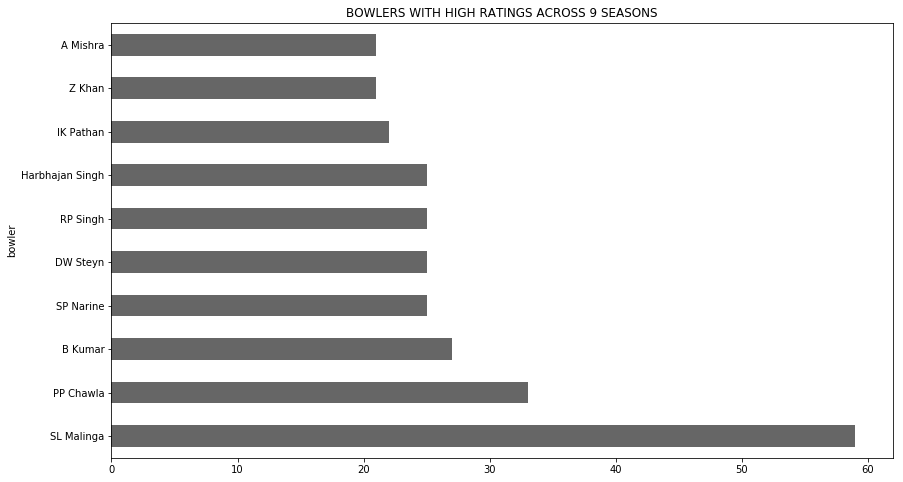

In [15]:
bowlers_wickets = bowled.groupby('bowler')['wicket_kind'].count()
#print(bowlers_wickets)
bowlers_wickets.sort_values(ascending = False, inplace = True)
blr=bowlers_wickets[:10]
plt.figure(figsize=(14,8))
plt.title(str('Bowlers with high ratings across 9 seasons').upper())
blr.plot(x= bowlers_wickets.index, y = bowlers_wickets, kind = 'barh', colormap = 'Accent_r');

### Certainly apart from team's consistency of performing well , we also have venues which plays an important part in scoring and defending. How did the different pitches behave? What was the average score for each stadium?

In [16]:
score_per_venue = data_ipl.loc[:, ['match_code', 'venue', 'inning', 'total']]
average_score_per_venue = score_per_venue.groupby(['match_code', 'venue', 'inning']).agg({'total' : 'sum'}).reset_index()
average_score_per_venue = average_score_per_venue.groupby(['venue', 'inning'])['total'].mean().reset_index()
average_score_per_venue.head()

,venue,inning,total
0,Barabati Stadium,1,167.714286
1,Barabati Stadium,2,157.714286
2,Brabourne Stadium,1,180.272727
3,Brabourne Stadium,2,168.909091
4,Buffalo Park,1,147.333333


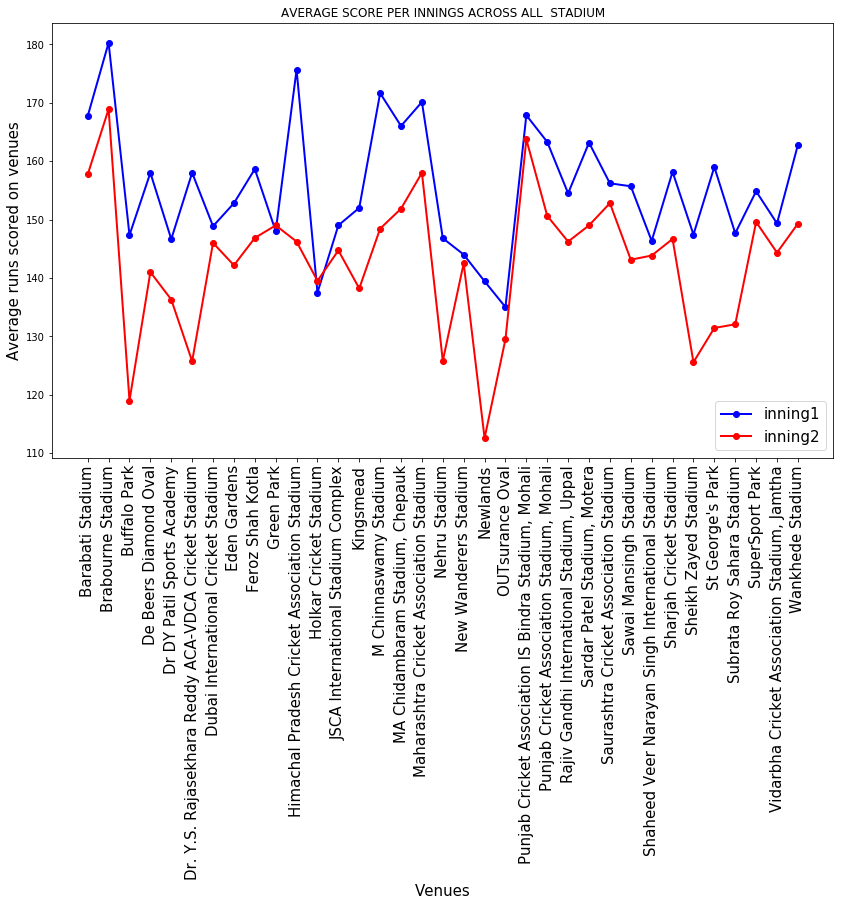

In [18]:
plt.figure(figsize=(14,8))
x1 = average_score_per_venue[average_score_per_venue['inning']==1]['venue']
y1 = average_score_per_venue[average_score_per_venue['inning']==1]['total']
x2 = average_score_per_venue[average_score_per_venue['inning']==2]['venue']
y2 = average_score_per_venue[average_score_per_venue['inning']==2]['total']
plt.plot( x1, y1, '-b',marker='o',ms=6,lw=2, label = 'inning1')
plt.plot( x2, y2, '-r',marker='o',ms=6,lw=2, label = 'inning2')
plt.legend(loc = 'lower right', fontsize = 15)
plt.title(str('average score per innings across all  stadium').upper())
plt.xticks(fontsize = 15, rotation=90)
plt.xlabel('Venues', fontsize=15)
plt.ylabel('Average runs scored on venues', fontsize=15)
plt.show()

### A dismissal occurs when the batsman is out (also known as the fielding side taking a wicket and/or the batting side losing a wicket). Let's look at our data and find out the types of Dismissal and how often they occur.

In [65]:
dismissed = data_ipl.groupby(['wicket_kind']).count().reset_index()
dismissed = dismissed[['wicket_kind', 'delivery']].rename(columns={'delivery' : 'count'})
dismissed

,wicket_kind,count
0,bowled,1248
1,caught,3950
2,caught and bowled,187
3,hit wicket,8
4,lbw,398
5,obstructing the field,1
6,retired hurt,8
7,run out,693
8,stumped,222


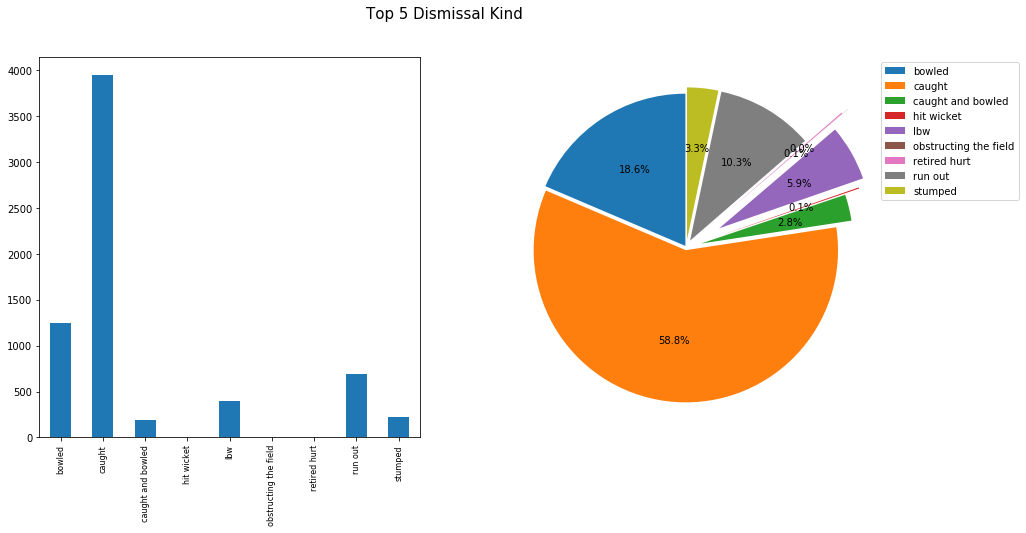

In [73]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))
f.suptitle("Top 5 Dismissal Kind", fontsize=15)

dismissed.plot.bar(ax=ax1, legend = False)
ax1.set_xticklabels(list(dismissed["wicket_kind"]), fontsize=8)

explode =[0.01,0.02,0.1,0.2,0.25,0.4,0.35,0.05,0.05]
properties = ax2.pie(dismissed["count"], labels=None, startangle=90, autopct='%1.1f%%', explode = explode)
ax2.legend(bbox_to_anchor=(1,1), labels=dismissed['wicket_kind'])


### Plot no. of boundaries (which includes what are the sixes and fours scored) across IPL seasons

In [80]:
runs_data = data_ipl.loc[:,['runs','year']]
boundaries = runs_data[runs_data['runs']==4]
fours = boundaries.groupby('year')['runs'].count()
sixes = runs_data[runs_data['runs']==6]
sixer = sixes.groupby('year')['runs'].count()

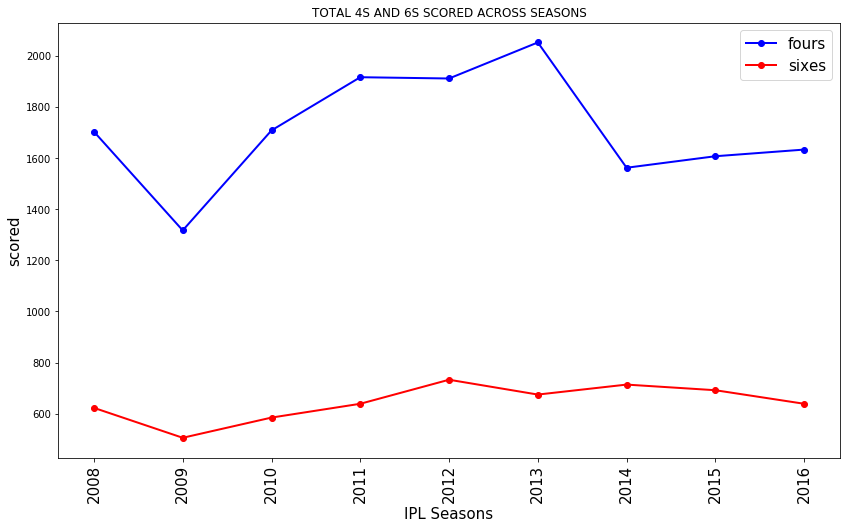

In [85]:
plt.figure(figsize=(14,8))
plt.plot(fours.index, fours,'-b',marker='o',ms=6,lw=2, label = 'fours')
plt.plot(sixer.index, sixer,'-r',marker='o',ms=6,lw=2, label = 'sixes')
plt.title(str('Total 4s and 6s scored across seasons').upper())
plt.legend(loc = 'upper right', fontsize = 15)
plt.xticks(fontsize = 15, rotation=90)
plt.xlabel('IPL Seasons', fontsize=15)
plt.ylabel('scored', fontsize=15)
plt.show()

### Get the average statistics across seasons (such as average runs scored per match, average balls bowled per match by season and average runs scored against each ball bowled per season)

In [90]:
per_match_data = data_ipl.drop_duplicates(subset='match_code', keep='first').reset_index(drop=True)
total_runs_per_season = data_ipl.groupby('year')['total'].sum()
balls_delivered_per_season = data_ipl.groupby('year')['delivery'].count()
no_of_match_played_per_season = per_match_data.groupby('year')['match_code'].count()

In [91]:
avg_runs_per_match = total_runs_per_season/no_of_match_played_per_season
avg_balls_per_match = balls_delivered_per_season/no_of_match_played_per_season
avg_runs_per_ball = total_runs_per_season/balls_delivered_per_season

In [93]:
avg_data = pd.DataFrame([no_of_match_played_per_season, avg_runs_per_match, avg_balls_per_match, avg_runs_per_ball])
avg_data.index =['No.of Matches', 'Average Runs per Match', 'Average balls bowled per match', 'Average runs per ball']
avg_data

year,2008,2009,2010,2011,2012,2013,2014,2015,2016
No.of Matches,58.000000,57.000000,60.000000,73.000000,74.000000,76.000000,60.000000,59.000000,60.000000
Average Runs per Match,309.241379,286.315789,314.366667,289.780822,303.391892,296.592105,315.150000,310.694915,314.366667
Average balls bowled per match,232.534483,238.508772,241.450000,233.054795,240.067568,238.842105,238.116667,231.186441,234.933333
Average runs per ball,1.329873,1.200441,1.301995,1.243402,1.263777,1.241792,1.323511,1.343915,1.338110


<Figure size 1008x576 with 0 Axes>

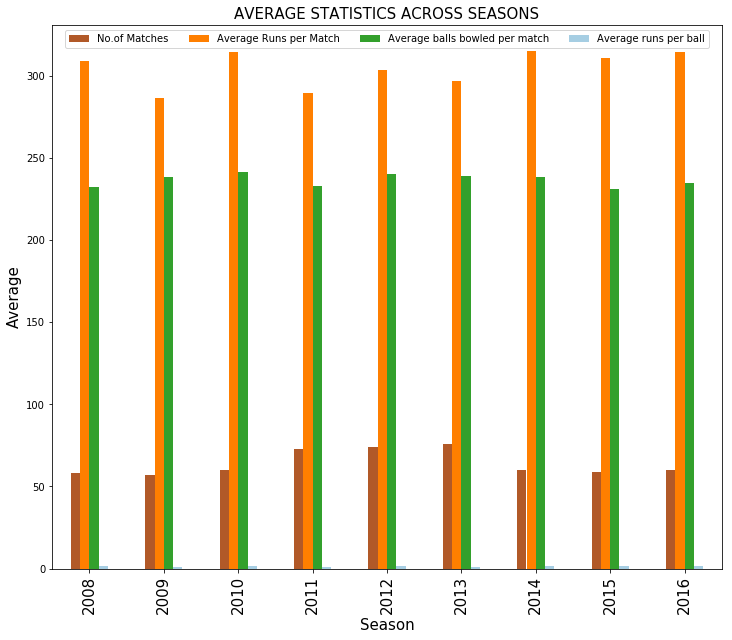

In [106]:
plt.figure(figsize=(14,8))
avg_data.T.plot(kind='bar', figsize = (12,10), colormap = 'Paired_r')
plt.title(str('average statistics across seasons').upper(), fontsize=15)
plt.xticks(fontsize = 15, rotation=90)
plt.xlabel('Season', fontsize=15)
plt.ylabel('Average', fontsize=15)
plt.legend(loc=9,ncol=4);

### Team wins in home city vs other cities
Each team plays two matches against the other teams, one in its home city and other in the home city of the opposite team. It would be interesting see if playing in home city increases a teams chances of a win.

In [119]:
match_wise_data.year = pd.to_numeric(match_wise_data.year) 

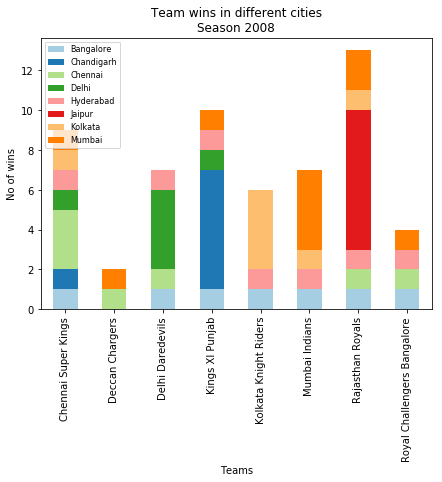

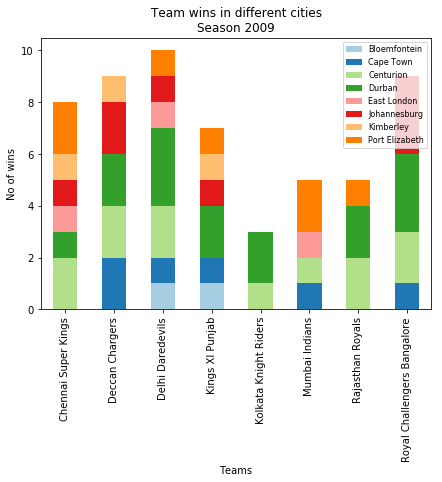

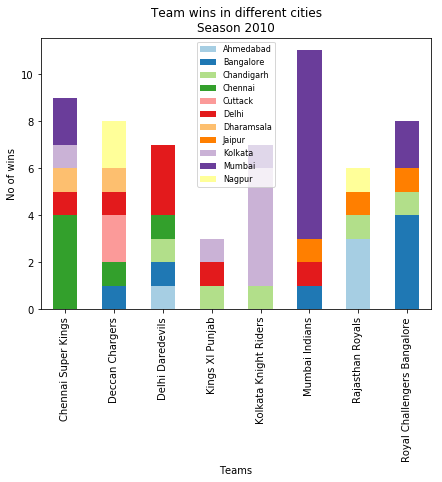

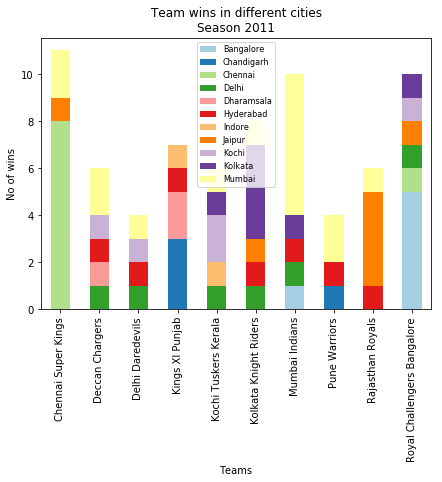

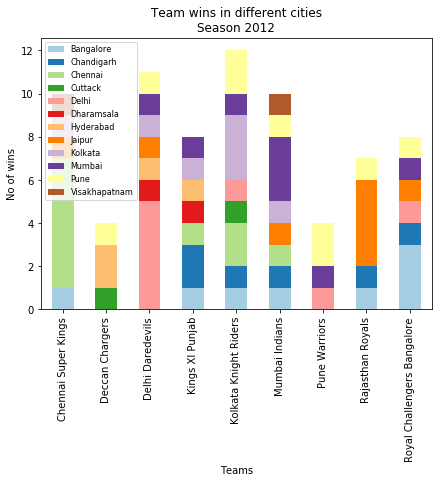

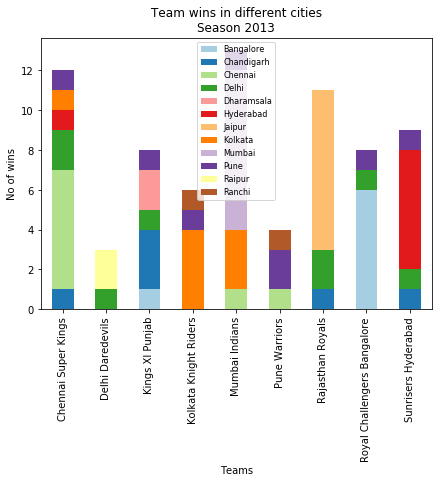

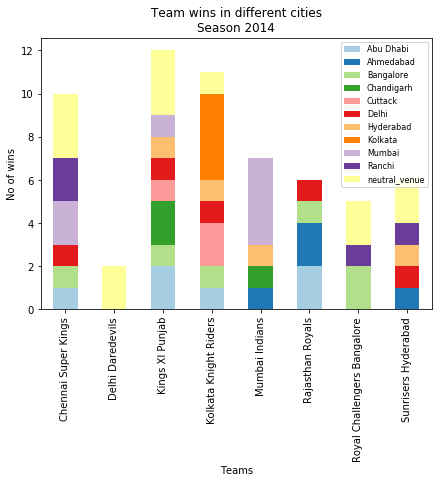

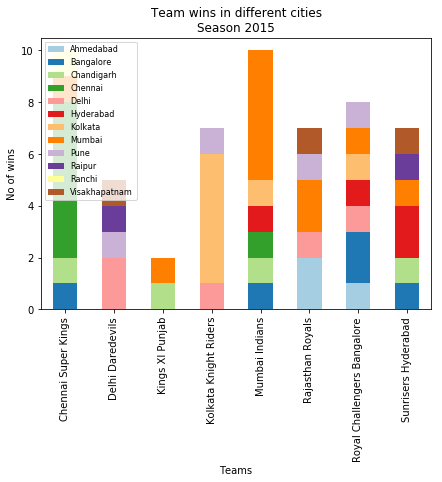

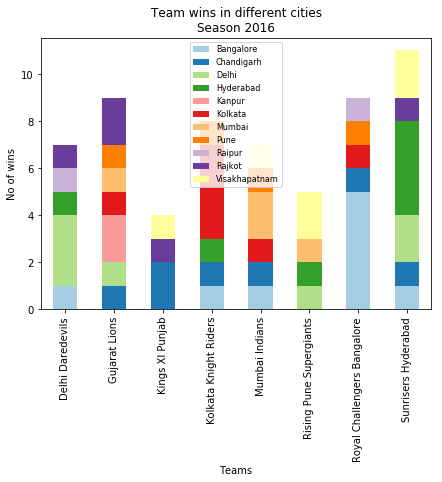

In [125]:
import seaborn as sns
#No of wins by team and season in each city
x, y = 2008, 2016
while x <=y:
    wins_per_city = match_wise_data[match_wise_data['year'] == x].groupby(['winner', 'city'])['match_code'].count()
    plot = wins_per_city.unstack().plot(kind='bar', stacked=True, title="Team wins in different cities\nSeason "+str(x), figsize=(7, 5))
    sns.set_palette("Paired", len(match_wise_data['city'].unique()))
    plot.set_xlabel("Teams")
    plot.set_ylabel("No of wins")
    plot.legend(loc='best', prop={'size':8})
    x+=1